# Is there a correlation between local election results and global germany polling?

This notebook is a start to investigating this question.

## TODO
- Take into account if party is ruling in local / german government
- Extend the number of datapoints for German polling
- Include other local elections

## Answer
- Looking at the three results plotted below for the Hamburg local election, one does not see any indication of correlation. As noted above, there are other factors, one could take into account. That would require extending the number of data points.

In [3]:
import pandas as pd
import seaborn as sns

from election_data.constants import party_to_color
from election_data import get_germany_result
from lib import extract_value, extract_german_date

%pylab inline


def load_local_hamburg_results_from_wikipedia():
    data = pd.read_html('https://de.wikipedia.org/wiki/Politik_in_Hamburg#1945_bis_2011')

    results = data[1]
    results.columns = list(map(lambda x: x[1], results.columns))

    for column in results.columns:
        results[column] = results[column].map(extract_value)
        
    results['Date'] = results['Wahltermin'].map(extract_german_date)

    parsed = pd.DataFrame()
    for column, target in [
        ("Date", "Date"),
        ("SPD", "SPD"),
        ("CDU", "CDU"),
        ("Grüne1", "GRÜNE"),
        ("FDP", "FDP"),
        ("Die Linke2", "LINKE"),
        ("AfD", "AfD")
    ]:
        parsed[target] = results[column]
        
    parsed['Idx'] = parsed['Date']
    parsed = parsed.set_index('Idx')

    return parsed[parsed['Date'] > '1980-01-01']

local_results = load_local_hamburg_results_from_wikipedia()

Populating the interactive namespace from numpy and matplotlib


germany  local    party
0  36.556284   42.6  CDU/CSU
1  28.552224   34.1      SPD
2   8.833754    9.6    GRÜNE
3   9.704583    4.8      FDP
4  12.138512    6.4    LINKE


Text(0.5, 1.0, 'Results Hamburg Election vs Germany Polling')

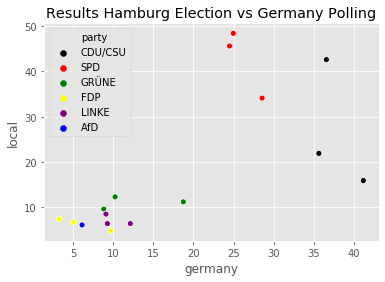

In [6]:
df = pd.DataFrame()

for date in ['2008-02-24', '2011-02-20', '2015-02-15']:
    germany = get_germany_result(date).to_dict()
    local = local_results.loc[date]
    for key in germany:
        if key not in party_to_color:
            continue
        party = key
        party_local = 'CDU' if key == 'CDU/CSU' else key
        if isinstance(local[party_local], float):
            df = df.append({
                'germany': germany[party],
                'local': local[party_local],
                'party': party
            }, ignore_index=True)

print(df.head())


sns.scatterplot(x="germany", y="local", hue="party", data=df, palette=party_to_color).set_title('Results Hamburg Election vs Germany Polling')